In [4]:
#如果你的def 在上一層的某個資料夾路徑, 你要將sys 裡面的路徑加入'..'
# 讓系統搜索資料夾十也可以網上一層搜索
import sys
sys.path.append('..')
from day_2.def_file.my_group_fun import my_add_fun

In [16]:
#矩陣介紹/查找類別,屬性
import numpy as np
array_1 = np.array([[1,2,3],[4,5,6]],dtype = np.float)
print(array_1)
print('矩陣的形狀:',array_1.shape)
array_2 = array_1.reshape((6,1))
print('變更矩陣的形狀:\n',array_2)

#看一下三維
array_3 = np.array([[[1,2,3],[4,5,6]],[[0,0,0],[0,0,0]]])
array_3.shape

[[1. 2. 3.]
 [4. 5. 6.]]
矩陣的形狀: (2, 3)
變更矩陣的形狀:
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]


C:\Users\10903059\AppData\Local\Temp/ipykernel_4344/64927061.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  array_1 = np.array([[1,2,3],[4,5,6]],dtype = np.float)


(2, 2, 3)

In [49]:
#轉置矩陣
array_2.T
#單位矩陣
e = np.eye(4,4)
#單位矩陣常用在轉換維度向量化
list_a = [10,20,30,40]
list_a*e
#0/1矩陣  通常可以針對當維度整個資料統一做運算
np.zeros((4,4))
np.ones((4,4))
array_4 = array_1-(np.ones((2,3))*7)
#矩陣一樣可以像list一樣去指定位置
print(array_4)
array_4[0,1:] #位置 [row位置 , column位置]
#學習重點:
# 1.了解了.T  / .eye  /.shape  /.zeros / .ones功能
# 2. 了解到了array矩陣可以去指定某個範圍的值


[[-6. -5. -4.]
 [-3. -2. -1.]]


array([-5., -4.])

In [69]:
#舉個例子,要將3為資料去針對深度的維度取平均,並且轉乘list
#2維平均
my_data = np.random.rand(5,8)
print('我的數據:\n',my_data ,'\n數據平均:\n',np.mean(my_data))
my_data_std = my_data.std()
print('數據標準差:',my_data_std)
median = np.median(my_data)
print('數據中位數:',median)
#處理3維數據:
my_data_3d = np.random.rand(5,3,3)
my_data_3d.shape
dim_1 = my_data_3d.shape[0]
empty = []
for i in range(dim_1): #每走過每個深度的2d array
    m = my_data_3d[i:i+1,:,:].mean()  #[深度位置,2d的row位置,2d的column位置]
    print(m)
    empty.append(m)
empty

0.27669084345965644
0.3445514290754595
0.5370999150774105
0.45157765905703084
0.5021578318134393


[0.27669084345965644,
 0.3445514290754595,
 0.5370999150774105,
 0.45157765905703084,
 0.5021578318134393]

In [79]:
#假這你有額外的數據想要添加到某個特定矩陣  concatenate / stack
a_r = np.random.rand(3,3)
b_r = np.zeros((3,3))
con = np.concatenate((a_r,b_r),axis = 0) #axis:針對哪個方向做拼接
con.shape
vs = np.vstack((a_r,b_r))
print('直方向做堆疊:\n',vs)
print('='*15)
hs = np.hstack((a_r,b_r))
print('直方向做堆疊:\n',hs)
print('==================以上矩陣堆疊都不增加維度======================')
ss = np.stack((a_r,b_r))
print('維度形狀:',ss.shape)
print('使用stack增加深度的堆疊:\n',ss)

直方向做堆疊:
 [[0.34310972 0.07894178 0.94569309]
 [0.59107777 0.16144966 0.26764162]
 [0.99086237 0.80436193 0.60602717]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
直方向做堆疊:
 [[0.34310972 0.07894178 0.94569309 0.         0.         0.        ]
 [0.59107777 0.16144966 0.26764162 0.         0.         0.        ]
 [0.99086237 0.80436193 0.60602717 0.         0.         0.        ]]
==================以上矩陣堆疊都不增加維度======================
維度形狀: (2, 3, 3)
使用stack增加深度的堆疊:
 [[[0.34310972 0.07894178 0.94569309]
  [0.59107777 0.16144966 0.26764162]
  [0.99086237 0.80436193 0.60602717]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]


In [99]:
#新功能pandas (可以想成是處理excel的工具包)
import pandas as pd
import numpy as np
#先做一個dataframe
df1 = pd.DataFrame({'key' : ['k0','k1','k2','k3'],
                 'col_1': [1,2,3,4],
                 'col_2': ['a','b','c','d']})
df2 = pd.DataFrame(np.ones((4,3)),columns = ['col1','col2','col3'])
df2.values  #顯示表格內容
df2.columns #顯示columns
df
df3 = df1[0:2][:]  #df[row起點:row終點][col起點:col終點]
df3
#學習重點:
#1. 了解了Dataframe 他吃的型態,可以是(np,columns)  或者是用字典的方式把column跟value 直接寫一起
#2. 可以使用.values .columns 直接看表單的內容以及columns
#3. df 要去查找位置,跟np有點不一樣,df後面是跟兩個[],df[row起點:row終點][col起點:col終點]

,key,col_1,col_2
0,k0,1,a
1,k1,2,b


In [109]:
# 新增欄位
df1['col_3'] = [6,7,8,9]
df1['key'] = [6,7,8,9]
#如果df['想要新增的col名'],不存在原有的df 那麼新增的資訊就會加到最右邊那欄

,key,col_1,col_2,col_3
0,6,1,a,6
1,7,2,b,7
2,8,3,c,8
3,9,4,d,9


In [113]:
# apply 功能
def my_fun_add100(data):
    return data+100
df1['col_new'] = df1['col_1'].apply(my_fun_add100)
#拿取df1裡面的col_1這欄,每一格數據,都直接套用我們自己寫的fun(my_fun_add100) ,套用完之後,把整個col灌到新的col_new中
df1

,key,col_1,col_2,col_3,col_new
0,6,1,a,6,101
1,7,2,b,7,102
2,8,3,c,8,103
3,9,4,d,9,104


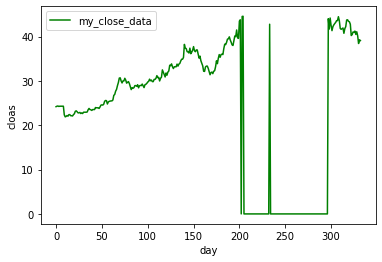

In [129]:
# 最終練習,讀取我們要的stock excel 把收盤價讀出來,高於閥值的收盤價以0做取代,然後畫圖
import matplotlib.pyplot as plt
df = pd.read_csv('./stock.csv')

def filter_th(data):
    if data>45:
        return 0
    else:
        return data
df['new_close'] = df['收盤價'].apply(filter_th)
my_data = list(df['new_close'])
plt.plot(range(0,len(my_data)),my_data,label = 'my_close_data',c='green')
# plt.bar(range(0,len(my_data)),my_data)
plt.xlabel('day')
plt.ylabel('cloas')
plt.legend()
plt.show()


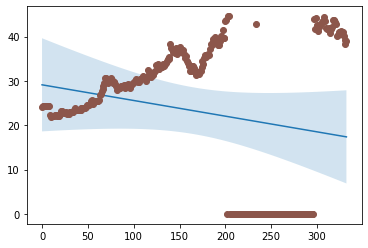

In [133]:
N = 21
# x = np.linspace(0, 10, 11)
# y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
x = np.array(range(0,len(my_data)))
y = my_data


# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

In [ ]:
#作業
# 把stock 用apply 自己做一個針對收盤價,去做一個移動平均 (slide windows = 3),並且畫圖(折線圖)
